In [ ]:
import tensorflow as tf
from tensorflow import keras
import os
image_size = (300,300)
batch_size = 36
dataset_path = "/content/UCMerced_LandUse/Images"
class_names = sorted(os.listdir(dataset_path))

In [ ]:
import PIL
import numpy as np
image_data = []
labels = []
ss = True
first_images = dict()
for i in range(len(class_names)):
  class_path = os.path.join(dataset_path, class_names[i])
  image_files = os.listdir(class_path)
  ss2=True
  for name in image_files:
    image_path = os.path.join(class_path, name)
    image = PIL.Image.open(image_path)
    image = image.convert("RGB")
    image = image.resize(image_size)
    image_data.append(np.asarray(image))
    vec = [0 for x in range(21)]
    vec[i]=1
    labels.append(vec)
    if ss2==True:
      first_images[class_names[i]]=np.asarray(image)
      ss2=False
    if ss==True:
      print(len(image_files),"Images in each class")
      print(image.size)
      print(image.format)
      print(image.mode)
      ss=False

100 Images in each class
(300, 300)
None
RGB


In [ ]:
from sklearn.model_selection import train_test_split
image_data = np.array(image_data)
lables = np.array(labels)
X_train, X_val, y_train, y_val = train_test_split(image_data, labels, test_size=0.2, random_state=42, stratify=labels)
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size).shuffle(69).prefetch(tf.data.AUTOTUNE)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

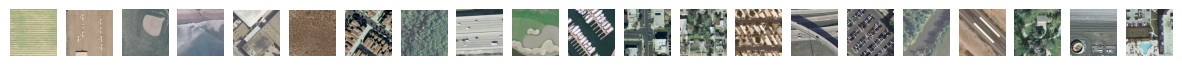

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, len(class_names), figsize=(15, 5))
for ax, class_index in zip(axes, first_images.keys()):
    ax.imshow(first_images[class_index])
    # ax.set_title(class_index)
    ax.axis("off")
plt.show()

In [ ]:
def create_network(input_shape, class_num):
  input_tensor = keras.Input(shape=input_shape)
  x = keras.layers.Conv2D(32, (3, 3), activation="relu")(input_tensor)
  x = keras.layers.MaxPooling2D()(x)
  x = keras.layers.Conv2D(64, (3, 3), activation="relu")(x)
  x = keras.layers.MaxPooling2D()(x)
  x = keras.layers.Conv2D(128, (3, 3), activation="relu")(x)
  x = keras.layers.GlobalAveragePooling2D()(x)
  output_tensor = keras.layers.Dense(class_num, activation="softmax")(x)

  model = keras.Model(inputs=input_tensor, outputs=output_tensor)

  model.compile(optimizer="adam",
                loss="categorical_crossentropy",
                metrics=["accuracy"])
  return model
  import cv2
def generate_cam(model, image, class_index):
  last_conv_layer = model.get_layer("conv2d_11")
  feature_map_model = keras.Model(inputs=model.input, outputs=last_conv_layer.output)
  final_dense_layer = model.get_layer("dense_3")
  class_weights = final_dense_layer.get_weights()[0]

  conv_output = feature_map_model(np.array([image]))
  conv_output = conv_output[0]

  cam = np.dot(conv_output, class_weights[:, class_index])
  cam = np.maximum(cam,0)
  cam = cam/np.max(cam)

  cam = np.uint8(255*cam)
  cam = cv2.applyColorMap(cam, cv2.COLORMAP_JET)
  overlayed_img = cv2.addWeighted(image, 0.5, cam, 0.5, 0)
  return overlayed_img

In [ ]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=45
)

Epoch 1/45
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 278ms/step - accuracy: 0.0695 - loss: 13.3551 - val_accuracy: 0.1619 - val_loss: 2.8131
Epoch 2/45
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.1745 - loss: 2.6965 - val_accuracy: 0.2190 - val_loss: 2.4128
Epoch 3/45
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.2959 - loss: 2.2394 - val_accuracy: 0.3071 - val_loss: 2.2040
Epoch 4/45
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.3464 - loss: 2.1029 - val_accuracy: 0.3333 - val_loss: 2.1963
Epoch 5/45
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.3845 - loss: 1.8931 - val_accuracy: 0.3738 - val_loss: 2.0126
Epoch 6/45
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.4290 - loss: 1.7944 - val_accuracy: 0.4167 - val_loss: 1.8647
Epoch 7/45
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.4620 - loss: 1.7112 - val_accuracy: 0.4310 - val_loss: 1.8172
Epoch 8/45
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.5010 - loss: 1.6277 - val_accuracy: 0.4167 

In [ ]:
for i in range(len(class_names)):
  print("Mapping ",i,"::",class_names[i])

Mapping  0 :: agricultural
Mapping  1 :: airplane
Mapping  2 :: baseballdiamond
Mapping  3 :: beach
Mapping  4 :: buildings
Mapping  5 :: chaparral
Mapping  6 :: denseresidential
Mapping  7 :: forest
Mapping  8 :: freeway
Mapping  9 :: golfcourse
Mapping  10 :: harbor
Mapping  11 :: intersection
Mapping  12 :: mediumresidential
Mapping  13 :: mobilehomepark
Mapping  14 :: overpass
Mapping  15 :: parkinglot
Mapping  16 :: river
Mapping  17 :: runway
Mapping  18 :: sparseresidential
Mapping  19 :: storagetanks
Mapping  20 :: tenniscourt


In [ ]:
import cv2
def generate_cam(model, image, class_index):
  last_conv_layer = model.get_layer("conv2d_11")
  feature_map_model = keras.Model(inputs=model.input, outputs=last_conv_layer.output)
  final_dense_layer = model.get_layer("dense_3")
  class_weights = final_dense_layer.get_weights()[0]

  conv_output = feature_map_model(np.array([image]))
  conv_output = conv_output[0]

  cam = np.dot(conv_output, class_weights[:, class_index])
  cam = np.maximum(cam,0)
  cam = cam/np.max(cam)

  cam = np.uint8(255*cam)
  cam = cv2.applyColorMap(cam, cv2.COLORMAP_JET)

  # Convert cam to 3 channels (RGB) to match image
  cam = cv2.cvtColor(cam, cv2.COLOR_BGR2RGB)
  cam = cv2.resize(cam, (300, 300),
               interpolation = cv2.INTER_LINEAR)

  overlayed_img = cv2.addWeighted(image, 0.6, cam, 0.4, 0)
  return overlayed_img
cam_images = dict()
for i in range(len(class_names)):
  class_name = class_names[i]
  class_path = os.path.join(dataset_path, class_name)
  image_name = os.listdir(class_path)[0]
  image_path = os.path.join(class_path, image_name)
  img = PIL.Image.open(image_path)
  img = img.resize(image_size)
  img = np.asarray(img)
  overlayed_image = generate_cam(model,img,i)
  cam_images[class_name] = overlayed_image

array([[[100, 105, 157],
        [101, 106, 160],
        [101, 107, 163],
        ...,
        [110, 116, 168],
        [111, 118, 169],
        [112, 118, 169]],

       [[ 95,  99, 153],
        [ 97, 103, 156],
        [ 98, 104, 160],
        ...,
        [ 98, 101, 152],
        [ 97, 100, 151],
        [ 94,  99, 150]],

       [[ 94,  98, 151],
        [ 96, 100, 154],
        [ 97, 101, 156],
        ...,
        [ 97, 101, 154],
        [ 94,  99, 150],
        [ 91,  96, 148]],

       ...,

       [[115, 122, 172],
        [117, 122, 172],
        [118, 123, 172],
        ...,
        [103, 120, 213],
        [ 94, 110, 204],
        [ 90, 105, 200]],

       [[116, 124, 172],
        [117, 125, 174],
        [119, 125, 175],
        ...,
        [ 51,  67, 160],
        [ 53,  66, 160],
        [ 36,  49, 144]],

       [[118, 128, 175],
        [118, 126, 174],
        [119, 128, 176],
        ...,
        [ 12,  23, 120],
        [ 47,  58, 158],
        [ 47,  59, 159]]], dtype=uint8)
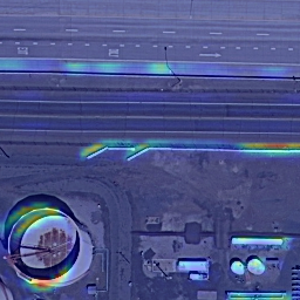

In [ ]:
cam_images['storagetanks']

array([[[113, 129, 177],
        [112, 127, 173],
        [114, 127, 172],
        ...,
        [  2,  51, 113],
        [  1,  49, 113],
        [  1,  48, 113]],

       [[112, 128, 175],
        [111, 125, 171],
        [115, 127, 172],
        ...,
        [  1,  51, 113],
        [  0,  48, 112],
        [  1,  49, 112]],

       [[112, 127, 173],
        [113, 125, 170],
        [117, 127, 172],
        ...,
        [  1,  54, 110],
        [  0,  53, 110],
        [  2,  54, 112]],

       ...,

       [[ 90,  83, 125],
        [ 82,  74, 117],
        [ 77,  69, 112],
        ...,
        [115, 106, 146],
        [113, 104, 145],
        [110, 100, 142]],

       [[101,  95, 138],
        [ 94,  88, 130],
        [ 86,  80, 123],
        ...,
        [113, 104, 145],
        [105,  97, 139],
        [ 91,  81, 124]],

       [[105, 101, 143],
        [101,  97, 139],
        [ 94,  91, 133],
        ...,
        [109, 100, 142],
        [ 95,  86, 129],
        [ 70,  62, 106]]], dtype=uint8)
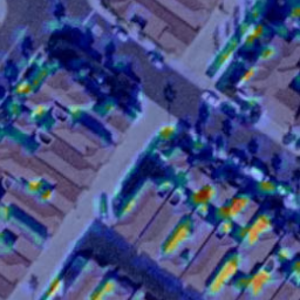

In [ ]:
cam_images['denseresidential']